# Define functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os

def fit_line(x_fit, y_fit):
    x_array = np.array(x_fit)
    y_array = np.array(y_fit)
    a, b = np.polyfit(x_array, y_array, 1)
    return a, b, x_array

def init(model, density):
    global simfiles_folder, tempfolders_loc, temp_foldernames, temps_str, temps, exentrfile_name, save_to_density, save_to_master, density_global, model_global, composition_subscript
    density_global = density
    model_global = model
    simfiles_folder = "simfiles"
    tempfolders_loc = f"./{model}/D{density}/{simfiles_folder}"
    temp_foldernames = os.listdir(tempfolders_loc)
    temps_str = [i[1:] for i in temp_foldernames]
    temps = [float(i[1:]) for i in temp_foldernames]
    composition_subscript = f"{model[2]}:{model[3]}:{model[4]}"
    

    try:
        exentrfile_name = [i for i in os.listdir(f"./{model}/D{density}") if i[:15] == 'free_energy_rho'][0]
    except:
        print("no entropy file")
        exentrfile_name = None

    #/{temp}/{run}/{kind}

    save_to_density = f""
    save_to_master = f"./master_plots/"

def titlemaker(model, density, run, kind = '', temp_title = None):
    pass
    # if temp_title == None:
    #     temperature_name = ''
    # else:
    #     temperature_name = f"- Temp {temp_title}"
    # return plt.title(f"${model[:2]}_{{{composition_subscript}}}$ rho{density} ({run}) \n {kind} {temperature_name}")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

def make_figure():
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    
    for run in runs[-1:]:
            df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat")) #makes dataframe from the given type of file (msd/fs etc)
            # plt.title(f"{model} rho{density} ({run}) \n {kind} - Temp {temp_str}")
            plt.plot(df[0], df[1], label = f"{model_global} rho{density_global} T{temp_str}", marker = plotmarker, color = plotmarker) #plots the dataframe's given columns
            # titlemaker(model, density, run, kind, temp_str)

def color_changer():
    global plotcolor, plotmarker
    if model_global == "KA822":
        plotcolor = 'red'
        if density_global == '1.2':
            plotmarker = 'o'
        elif density_global == '1.35':
            plotmarker  = 's'
        elif density_global == '1.5':
            plotmarker = '^'
    elif model_global == "KA824":
        plotcolor == 'green'
        if density_global == '1.15':
            plotmarker = 'D'
        elif density_global == '1.2':
            plotmarker = 'o'

    elif model_global == 'WS111':
        plotcolor == 'blue'
        if density_global == '0.5':
            plotmarker = 'X'
        if density_global == '0.6':
            plotmarker = 'p'

def show_plot(figname, xlog = False, ylog = False, xlabel = '', ylabel = ''):
    if xlog:
        plt.xscale("log")
    if ylog:
        plt.yscale("log")
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("./plots_to_overleaf/" + figname + ".png", dpi=200)
    

# Plot things

# FS

In [2]:
x_name = "t (reduced units)"
y_name = "$F_{sA}(q_{max},t)$"

### a

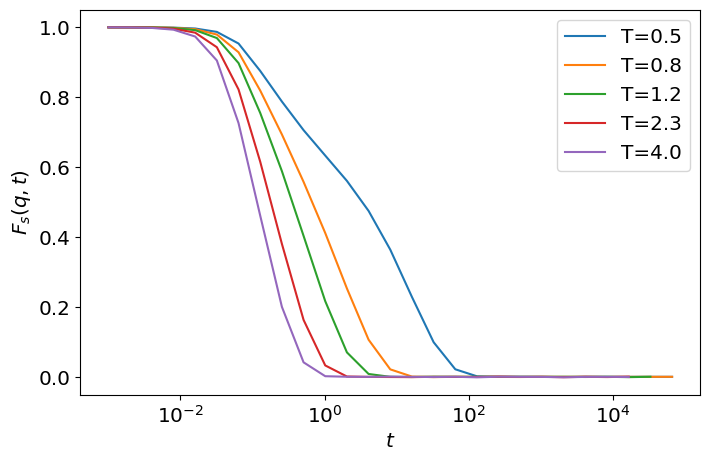

In [3]:
# KA822 rho1.2, 6 T
kind = 'fs'
plotname = 'a'

init('KA822', 1.2)

for temp_str in temps_str[0::3]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))

        plt.plot(df[0], df[1], label = f"T={temp_str}")
titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlog=True, xlabel="$t$", ylabel="$F_{s}(q,t)$")


### b

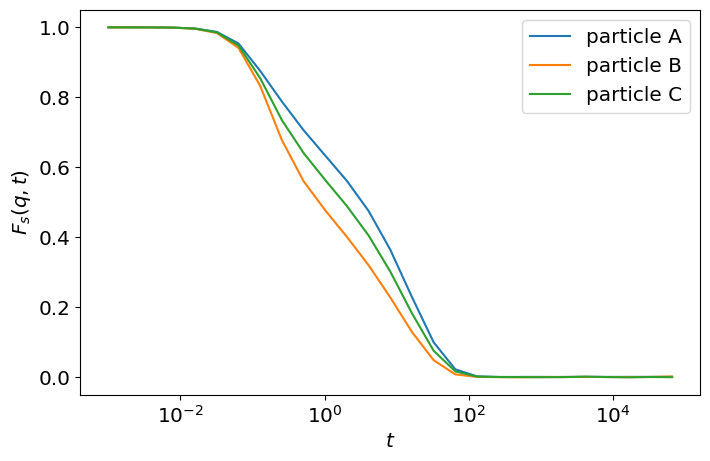

In [4]:
# All 6 types for one model
kind = 'fs'
plotname = 'b'

init('KA822', 1.2)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))

        plt.plot(df[0], df[1], label = f"particle A")
        plt.plot(df[0], df[2], label = f"particle B")
        plt.plot(df[0], df[3], label = f"particle C")

    titlemaker(model_global, density_global, kind, temp_title=temp_str)
show_plot(figname = f"{kind}_{plotname}", xlog=True, xlabel="$t$", ylabel="$F_{s}(q,t)$")


### c

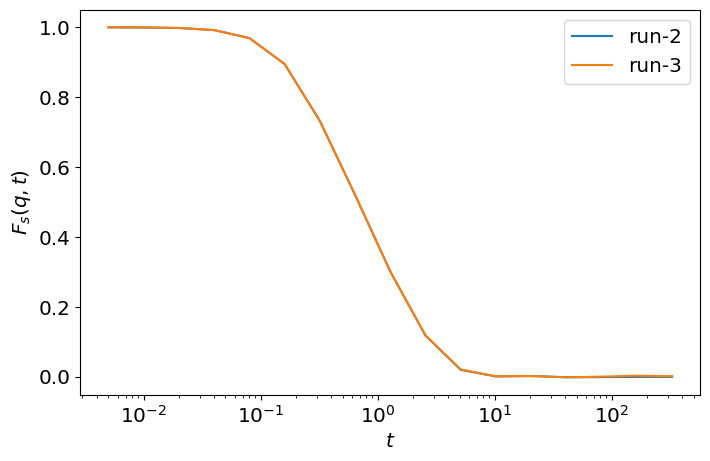

In [5]:
# All 6 types for one model
kind = 'fs'
plotname = 'c'

init('WS111', 0.6)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-2:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[:17]

        plt.plot(df[0], df[1], label = f"{run}")

    titlemaker(model_global, density_global, kind, temp_title=temp_str)
show_plot(figname = f"{kind}_{plotname}", xlog=True, xlabel="$t$", ylabel="$F_{s}(q,t)$")


### e

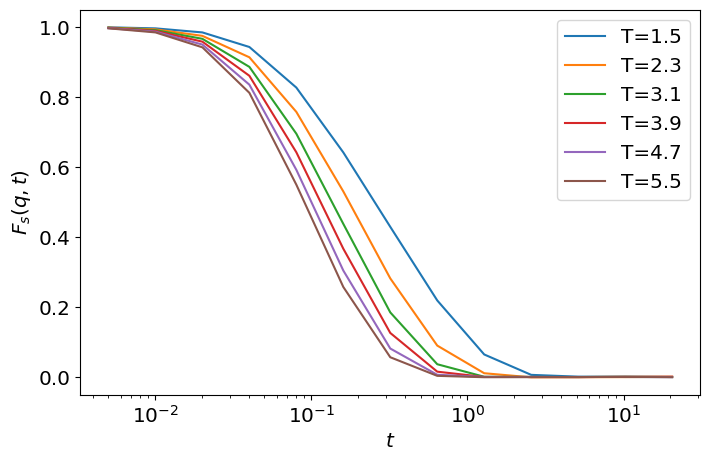

In [6]:
# KA824 rho1.2, 6 T
kind = 'fs'
plotname = 'e'

init('KA824', 1.2)

for temp_str in temps_str[0::2]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[:13]

        plt.plot(df[0], df[1], label = f"T={temp_str}")
titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlog=True, xlabel="$t$", ylabel="$F_{s}(q,t)$")

### f

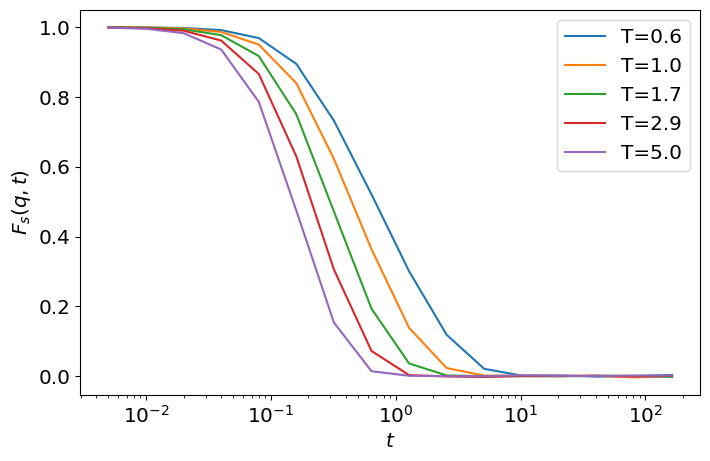

In [7]:
# KA824 rho1.2, 6 T
kind = 'fs'
plotname = 'f'

init('WS111', 0.6)

for temp_str in temps_str[0::3]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[:16]

        plt.plot(df[0], df[1], label = f"T={temp_str}")
titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlog=True, xlabel="$t$", ylabel="$F_{s}(q,t)$")

### g

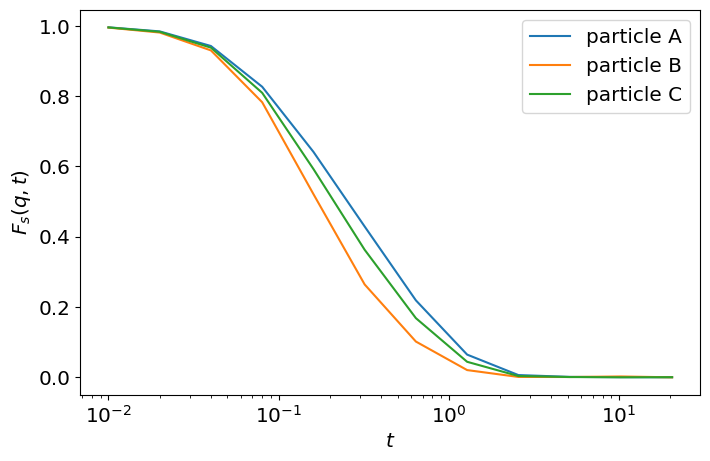

In [8]:
# KA824 rho1.2, 6 T
kind = 'fs'
plotname = 'g'

init('KA824', 1.2)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[1:13]

        plt.plot(df[0], df[1], label = f"particle A")
        plt.plot(df[0], df[2], label = f"particle B")
        plt.plot(df[0], df[3], label = f"particle C")

    titlemaker(model_global, density_global, kind, temp_title=temp_str)
show_plot(figname = f"{kind}_{plotname}", xlog=True, xlabel="$t$", ylabel="$F_{s}(q,t)$")

### h

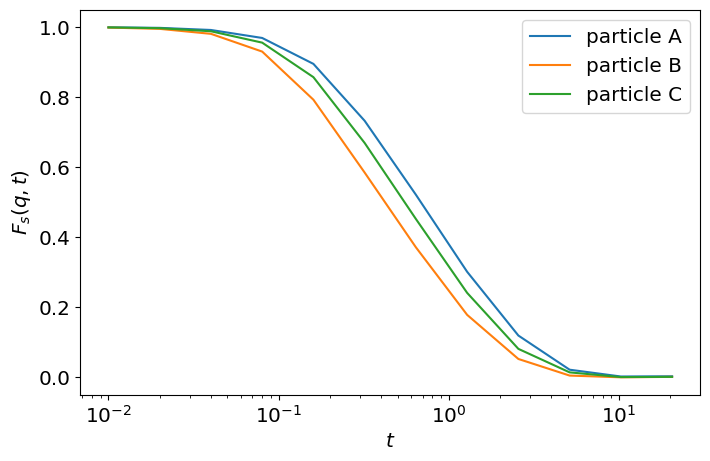

In [9]:
# KA824 rho1.2, 6 T
kind = 'fs'
plotname = 'h'

init('WS111', 0.6)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[1:13]

        plt.plot(df[0], df[1], label = f"particle A")
        plt.plot(df[0], df[2], label = f"particle B")
        plt.plot(df[0], df[3], label = f"particle C")

    titlemaker(model_global, density_global, kind, temp_title=temp_str)
show_plot(figname = f"{kind}_{plotname}", xlog=True, xlabel="$t$", ylabel="$F_{s}(q,t)$")

## MSD

# a

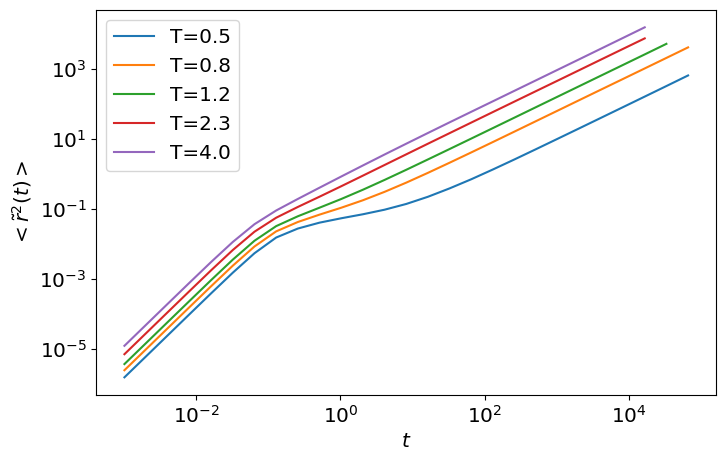

In [10]:
# KA822 rho1.2, 6 T
kind = 'msd'
plotname = 'a'

init('KA822', 1.2)

for temp_str in temps_str[::3]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))

        plt.plot(df[0], df[1], label = f"T={temp_str}")
titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlog=True, ylog = True, xlabel="$t$", ylabel="$<\\tilde{r}^2 (t)>$")

# b

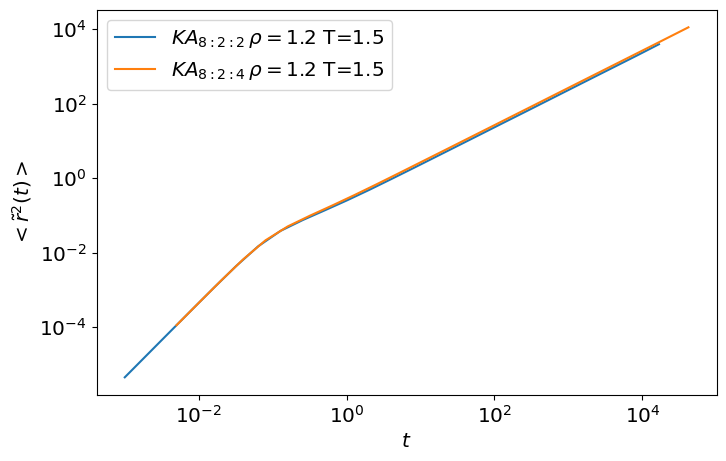

In [11]:
#KA Two compositions* - overlaps on D-S_ex plot

# plt.plot(KA822_D12["S_ex"][-5:-4], KA822_D12["red_diff"][-5:-4],  marker = mark, linestyle = line, label = "$KA_{8:2:2}$ $\\rho$=1.2")
# plt.plot(KA824_D115["S_ex"][1:2], KA824_D115["red_diff"][1:2], marker = mark, linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.15')

kind = 'msd'
plotname = 'b'

init('KA822', 1.2)

for temp_str in temps_str[7:8]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))
        plt.plot(df[0], df[1], label = f"$KA_{{8:2:2}} \\, \\rho=1.2$ T={temp_str}")

init('KA824', 1.2)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))
        plt.plot(df[0], df[1], label = f"$KA_{{8:2:4}} \\, \\rho=1.2$ T={temp_str}")

# titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlog=True, ylog = True, xlabel="$t$", ylabel="$<\\tilde{r}^2 (t)>$")

# c

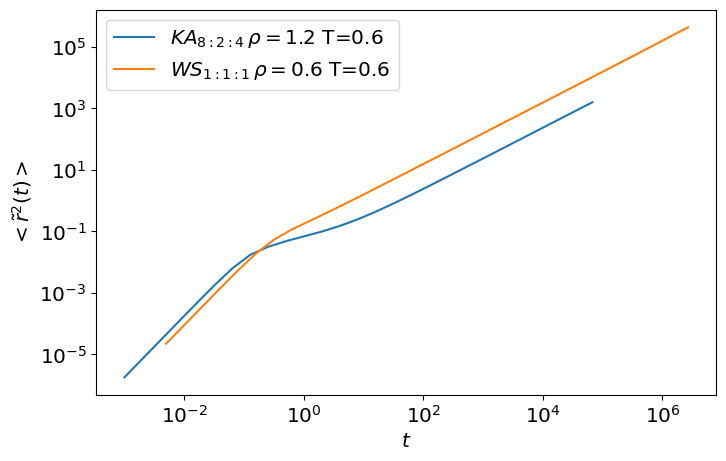

In [12]:
#KA and WS*

#KA Two compositions* - overlaps on D-S_ex plot

# plt.plot(KA824_D12["S_ex"][-5:], KA824_D12["red_diff"][-5:], marker = mark, linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.2')
# plt.plot(WS111_D05["S_ex"][:1], WS111_D05["red_diff"][:1], marker = mark, linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.5')

kind = 'msd'
plotname = 'c'

init('KA822', 1.2)

for temp_str in temps_str[1:2]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperatre folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))
        plt.plot(df[0], df[1], label = f"$KA_{{8:2:4}} \\, \\rho=1.2$ T={temp_str}")

init('WS111', 0.6)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))

        plt.plot(df[0], df[1], label = f"$WS_{{1:1:1}} \\, \\rho=0.6$ T={temp_str}")

# titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlog=True, ylog = True, xlabel="$t$", ylabel="$<\\tilde{r}^2 (t)>$")

# d

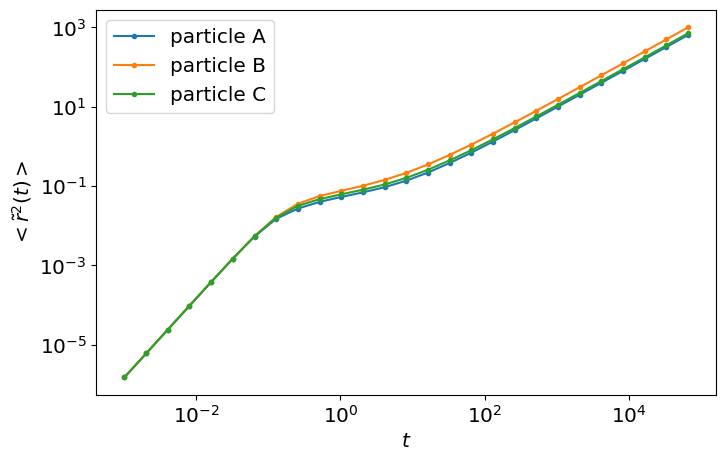

In [13]:
#KA 3 - 6 types in 1 composition
kind = 'msd'
plotname = 'd'

init('KA822', 1.2)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))

        plt.plot(df[0], df[1], label = f"particle A", marker = '.')
        plt.plot(df[0], df[2], label = f"particle B", marker = '.')
        plt.plot(df[0], df[3], label = f"particle C", marker = '.')

    titlemaker(model_global, density_global, kind, temp_title=temp_str)
show_plot(figname = f"{kind}_{plotname}", xlog=True, ylog = True, xlabel="$t$", ylabel="$<\\tilde{r}^2 (t)>$")

# e 

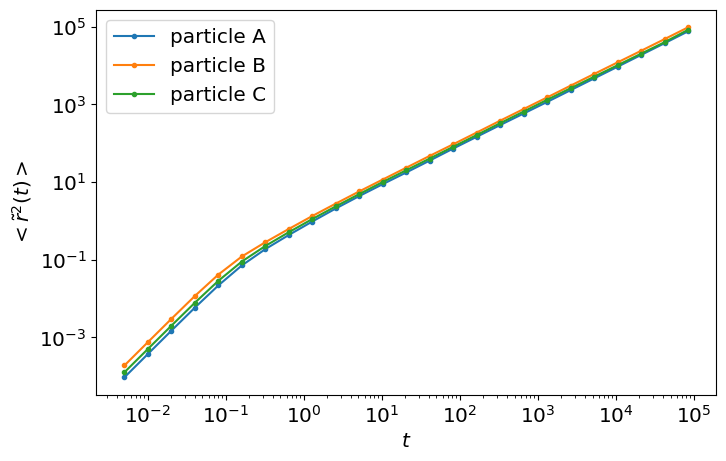

In [14]:
#KA 3 - 6 types in 1 composition
kind = 'msd'
plotname = 'e'

init('WS111', 0.6)

for temp_str in temps_str[-5:-4]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the tempeature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))

        plt.plot(df[0], df[1], label = f"particle A", marker = '.')
        plt.plot(df[0], df[2], label = f"particle B", marker = '.')
        plt.plot(df[0], df[3], label = f"particle C", marker = '.')

    titlemaker(model_global, density_global, f"{kind} - CHOSEN BEC IT IS KINDA AN OUTLIER", temp_title=temp_str)
show_plot(figname = f"{kind}_{plotname}", xlog=True, ylog = True, xlabel="$t$", ylabel="$<\\tilde{r}^2 (t)>$")

### f

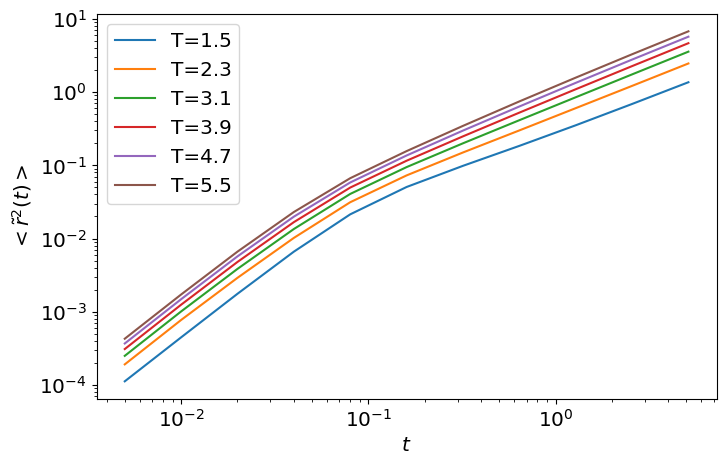

In [15]:
# KA824 rho1.2, 6 T
kind = 'msd'
plotname = 'f'

init('KA824', 1.2)

for temp_str in temps_str[::2]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[:11]

        plt.plot(df[0], df[1], label = f"T={temp_str}")
titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlog=True, ylog = True, xlabel="$t$", ylabel="$<\\tilde{r}^2 (t)>$")

### g

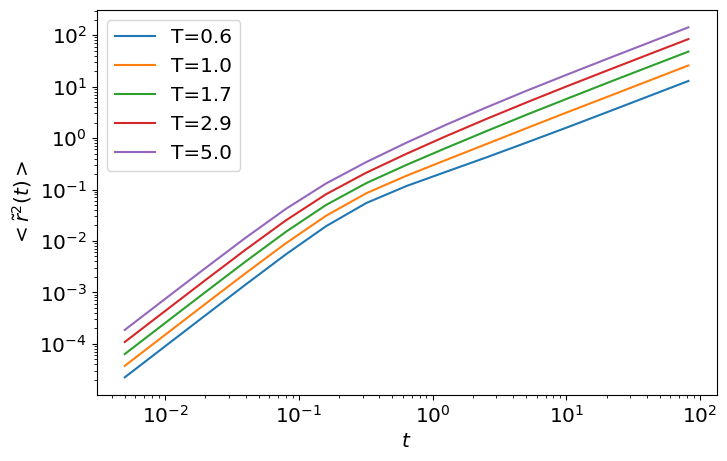

In [16]:
# WS111 rho0.6, 6 T
kind = 'msd'
plotname = 'g'

init('WS111', 0.6)

for temp_str in temps_str[::3]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[:15]

        plt.plot(df[0], df[1], label = f"T={temp_str}")
titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlog=True, ylog = True, xlabel="$t$", ylabel="$<\\tilde{r}^2 (t)>$")

### h

# RDF

# a

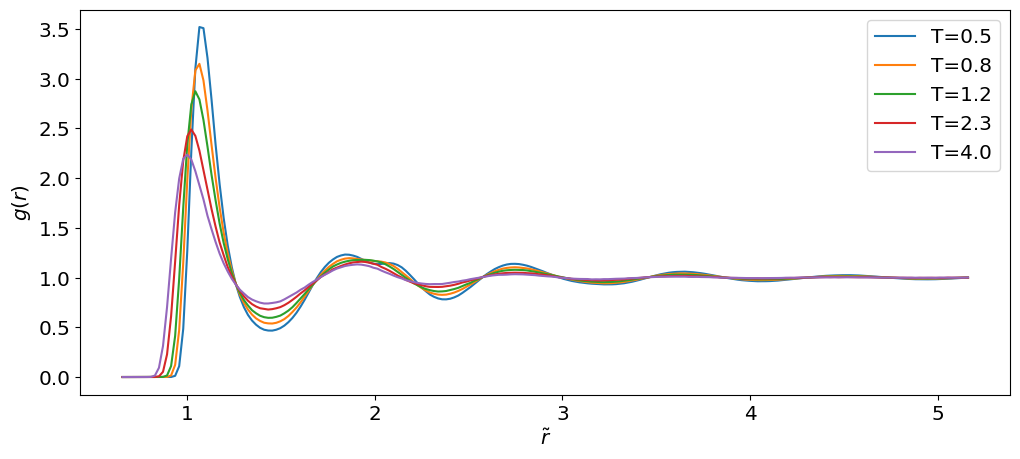

In [17]:
params = {'figure.figsize': (12, 5),}
pylab.rcParams.update(params)

# KA822 rho1.2, 6 T
kind = 'rdf'
plotname = 'a'

init('KA822', 1.2)

for temp_str in temps_str[::3]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[30:240]

        plt.plot(df[0], df[1], label = f"T={temp_str}")
titlemaker(model_global, density_global,kind)
show_plot(figname = f"{kind}_{plotname}", xlabel="$\\tilde{r}$", ylabel="$g(r)$")


# b

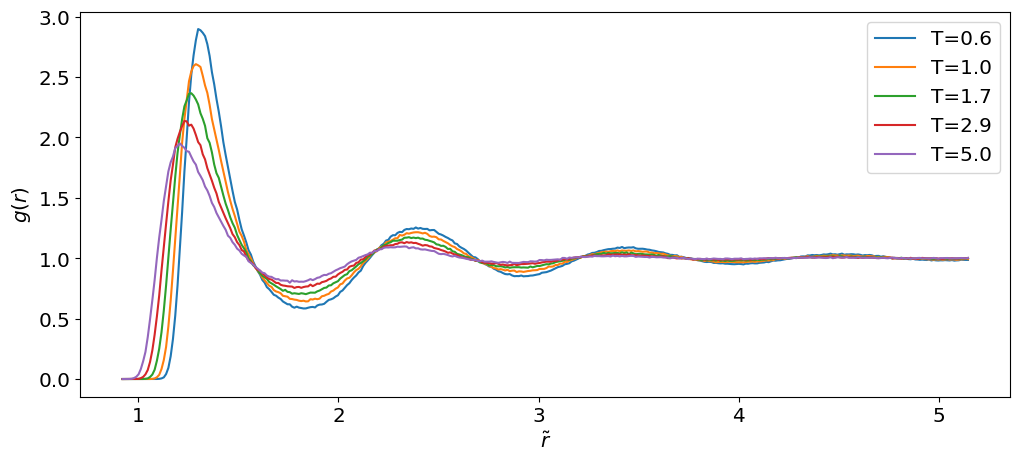

In [18]:
# WS111 1 rho, 6 T (how stable is WS with temperature change? As we go higher in T line becomes flatter and flatter)

kind = 'rdf'
plotname = 'b'

init('WS111', 0.6)

for temp_str in temps_str[::3]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[80:450]

        plt.plot(df[0], df[1], label = f"T={temp_str}")
titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlabel="$\\tilde{r}$", ylabel="$g(r)$")



# c

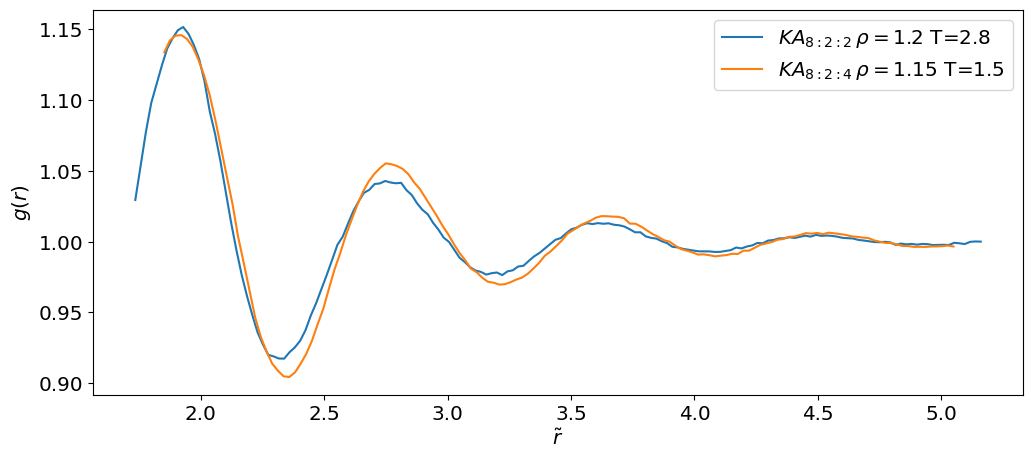

In [19]:
#Compare 2 comps which overlap on Sex/D plot* (CWT)
# plt.plot(KA822_D12["S_ex"][-5:-4], KA822_D12["red_diff"][-5:-4],  marker = mark, linestyle = line, label = "$KA_{8:2:2}$ $\\rho$=1.2")
# plt.plot(KA824_D115["S_ex"][1:2], KA824_D115["red_diff"][1:2], marker = mark, linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.15')

kind = 'rdf'
plotname = 'c'

init('KA822', 1.2)

for temp_str in temps_str[-5:-4]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[80:240]

        plt.plot(df[0], df[1], label = f"$KA_{{8:2:2}} \\, \\rho=1.2$ T={temp_str}")

init('KA824', 1.15)

for temp_str in temps_str[1:2]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[80:220]

        plt.plot(df[0], df[1], label = f"$KA_{{8:2:4}} \\, \\rho=1.15$ T={temp_str}")

# titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlabel="$\\tilde{r}$", ylabel="$g(r)$")



# d

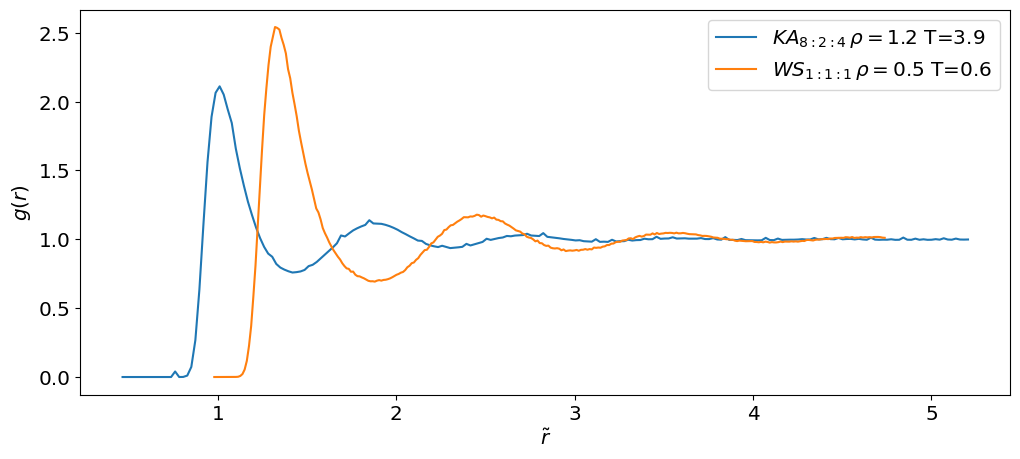

In [20]:
# Compare 2 models= which overlap on Sex/D plot*

# plt.plot(KA824_D12["S_ex"][-5:], KA824_D12["red_diff"][-5:], marker = mark, linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.2')
# plt.plot(WS111_D05["S_ex"][:1], WS111_D05["red_diff"][:1], marker = mark, linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.5')

kind = 'rdf'
plotname = 'd'

init('KA824', 1.2)

for temp_str in temps_str[-5:-4]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[20:230]

        plt.plot(df[0], df[1], label = f"$KA_{{8:2:4}} \\, \\rho=1.2$ T={temp_str}")

init('WS111', 0.5)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[80:390]

        plt.plot(df[0], df[1], label = f"$WS_{{1:1:1}} \\, \\rho=0.5$ T={temp_str}")

# titlemaker(model_global, density_global, kind)
show_plot(figname = f"{kind}_{plotname}", xlabel="$\\tilde{r}$", ylabel="$g(r)$")

# e

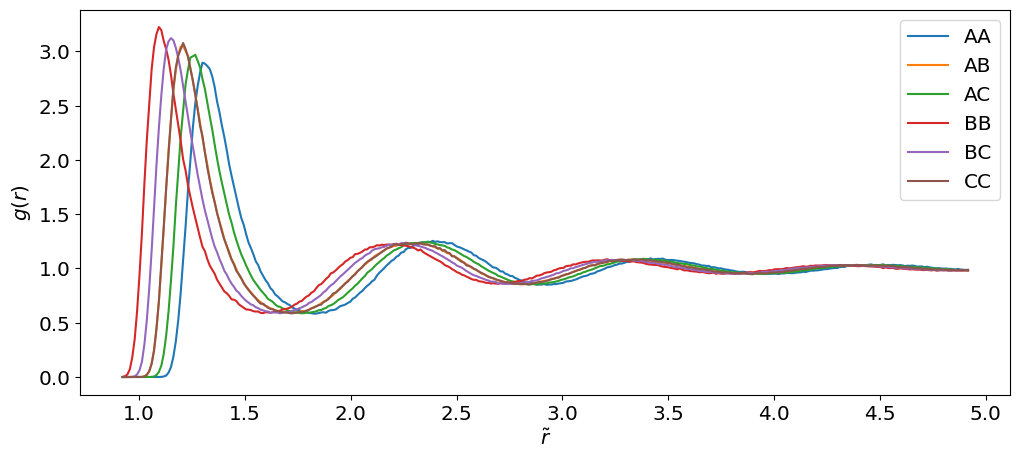

In [21]:
#WS111 1 rho, 3 types
kind = 'rdf'
plotname = 'e'

init('WS111', 0.6)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[80:430]

        plt.plot(df[0], df[1], label = f"AA")
        plt.plot(df[0], df[2], label = f"AB")
        plt.plot(df[0], df[3], label = f"AC")
        plt.plot(df[0], df[5], label = f"BB")
        plt.plot(df[0], df[6], label = f"BC")
        plt.plot(df[0], df[9], label = f"CC")

    titlemaker(model_global, density_global, kind, temp_title=temp_str)
show_plot(figname = f"{kind}_{plotname}", xlabel="$\\tilde{r}$", ylabel="$g(r)$")

# f

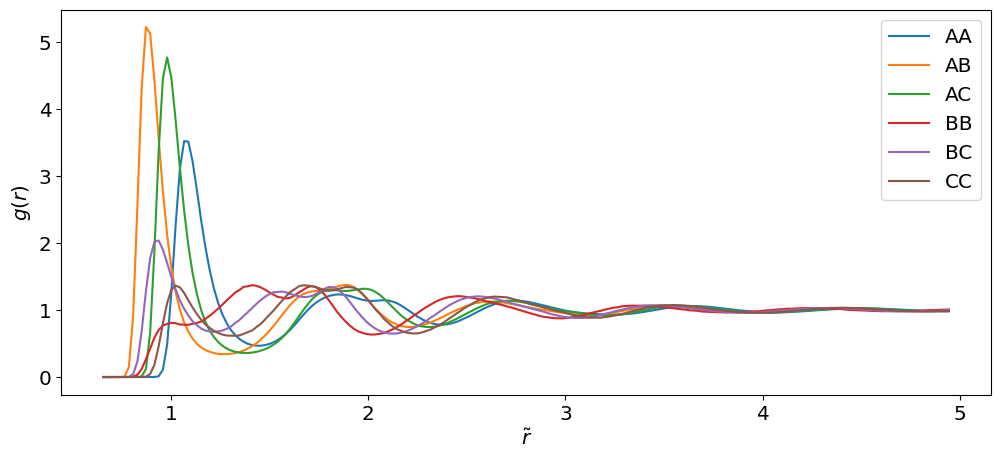

In [22]:
# KA822  1 rho, 3 - 6 types - try doing it for all temperature and see if somewhere it’s weird -> use that

kind = 'rdf'
plotname = 'f'

init('KA822', 1.2)

for temp_str in temps_str[:1]:
    runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
    for run in runs[-1:]:
        df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat"))[30:230]

        plt.plot(df[0], df[1], label = f"AA")
        plt.plot(df[0], df[2], label = f"AB")
        plt.plot(df[0], df[3], label = f"AC")
        # plt.plot(df[0], df[4], label = f"BA")
        plt.plot(df[0], df[5], label = f"BB")
        plt.plot(df[0], df[6], label = f"BC")
        # plt.plot(df[0], df[7], label = f"CA")
        # plt.plot(df[0], df[8], label = f"CB")
        plt.plot(df[0], df[9], label = f"CC")

    titlemaker(model_global, density_global, kind, temp_title=temp_str)
show_plot(figname = f"{kind}_{plotname}", xlabel="$\\tilde{r}$", ylabel="$g(r)$")

# D / 1/T

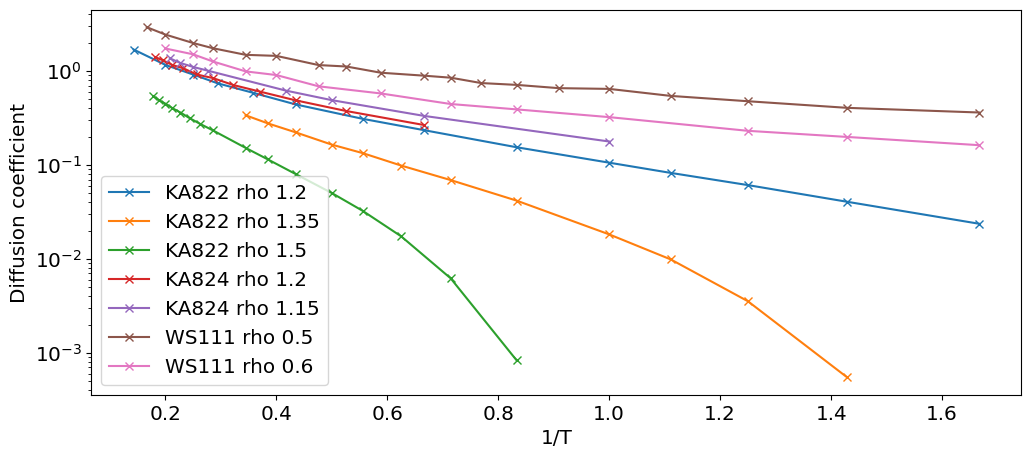

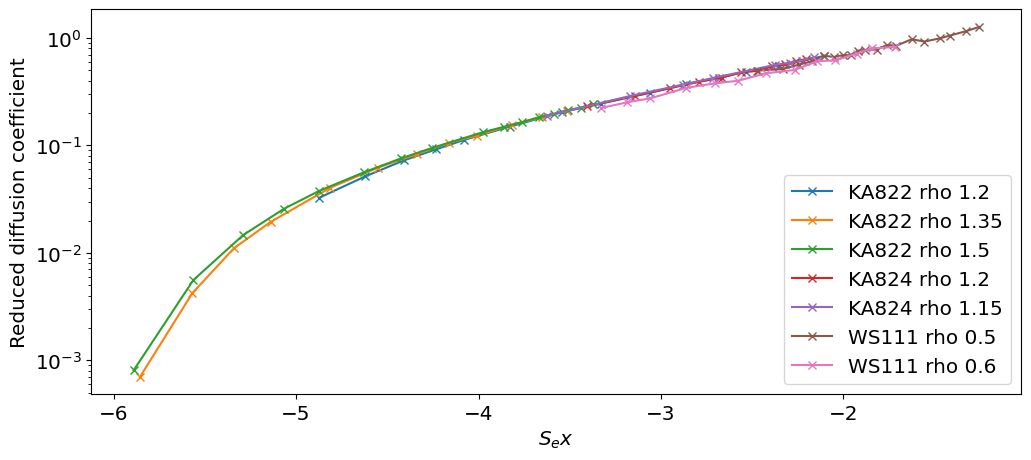

In [23]:
KA822_D12 = pd.read_csv("KA822_D1.2_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
KA822_D135 = pd.read_csv("KA822_D1.35_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
KA822_D15 = pd.read_csv("KA822_D1.5_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
KA824_D12 = pd.read_csv("KA824_D1.2_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
KA824_D115 = pd.read_csv("KA824_D1.15_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
WS111_D05 = pd.read_csv("WS111_D0.5_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])
WS111_D06 = pd.read_csv("WS111_D0.6_results.csv", usecols=["1/temp", "diff_coef", 'S_ex', 'red_diff'])


plt.xlabel("1/T")
plt.ylabel("Diffusion coefficient")
plt.yscale('log')
# plt.xscale('log')
# plt.title()
plt.plot(KA822_D12["1/temp"], KA822_D12["diff_coef"], marker = 'x', label = 'KA822 rho 1.2')
plt.plot(KA822_D135["1/temp"], KA822_D135["diff_coef"], marker = 'x', label = 'KA822 rho 1.35')
plt.plot(KA822_D15["1/temp"], KA822_D15["diff_coef"], marker = 'x', label = 'KA822 rho 1.5')
plt.plot(KA824_D12["1/temp"], KA824_D12["diff_coef"], marker = 'x', label = 'KA824 rho 1.2')
plt.plot(KA824_D115["1/temp"], KA824_D115["diff_coef"], marker = 'x', label = 'KA824 rho 1.15')
plt.plot(WS111_D05["1/temp"], WS111_D05["diff_coef"], marker = 'x', label = 'WS111 rho 0.5')
plt.plot(WS111_D06["1/temp"], WS111_D06["diff_coef"], marker = 'x', label = 'WS111 rho 0.6')
plt.legend()
plt.show()


plt.xlabel("$S_ex$")
plt.ylabel("Reduced diffusion coefficient")
plt.yscale('log')
# plt.xscale('log')
plt.plot(KA822_D12["S_ex"], KA822_D12["red_diff"], marker = 'x', label = 'KA822 rho 1.2')
plt.plot(KA822_D135["S_ex"], KA822_D135["red_diff"], marker = 'x', label = 'KA822 rho 1.35')
plt.plot(KA822_D15["S_ex"], KA822_D15["red_diff"], marker = 'x', label = 'KA822 rho 1.5')
plt.plot(KA824_D12["S_ex"], KA824_D12["red_diff"], marker = 'x', label = 'KA824 rho 1.2')
plt.plot(KA824_D115["S_ex"], KA824_D115["red_diff"], marker = 'x', label = 'KA824 rho 1.15')
plt.plot(WS111_D05["S_ex"], WS111_D05["red_diff"], marker = 'x', label = 'WS111 rho 0.5')
plt.plot(WS111_D06["S_ex"], WS111_D06["red_diff"], marker = 'x', label = 'WS111 rho 0.6')
plt.legend()
plt.show()

# plt.savefig("intomidterm.png")

params = {'figure.figsize': (10, 6)}
pylab.rcParams.update(params)

# a

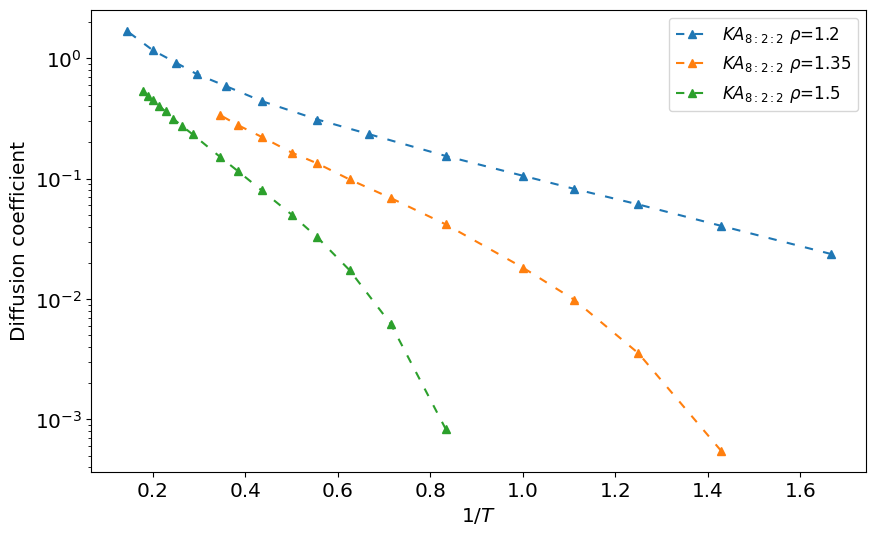

In [24]:
# KA
kind = 'diff-temp'
plotname = 'a'

mark = 'o'
line = (0, (4, 5))

params = {'legend.fontsize': 'large'}
pylab.rcParams.update(params)

plt.plot(KA822_D12["1/temp"], KA822_D12["diff_coef"], marker = '^', linestyle = line, label = "$KA_{8:2:2}$ $\\rho$=1.2")
plt.plot(KA822_D135["1/temp"], KA822_D135["diff_coef"], marker = '^', linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.35')
plt.plot(KA822_D15["1/temp"], KA822_D15["diff_coef"], marker = '^', linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.5')


show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$1/T$", ylabel="Diffusion coefficient")

# b

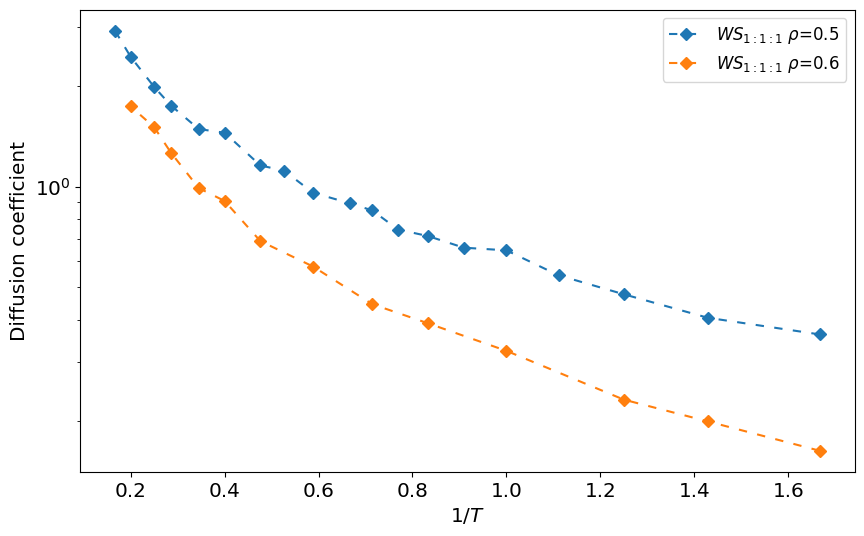

In [25]:
# WS
kind = 'diff-temp'
plotname = 'b'

plt.plot(WS111_D05["1/temp"], WS111_D05["diff_coef"], marker = 'D', linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.5')
plt.plot(WS111_D06["1/temp"], WS111_D06["diff_coef"], marker = 'D', linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.6')


show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$1/T$", ylabel="Diffusion coefficient")

# c

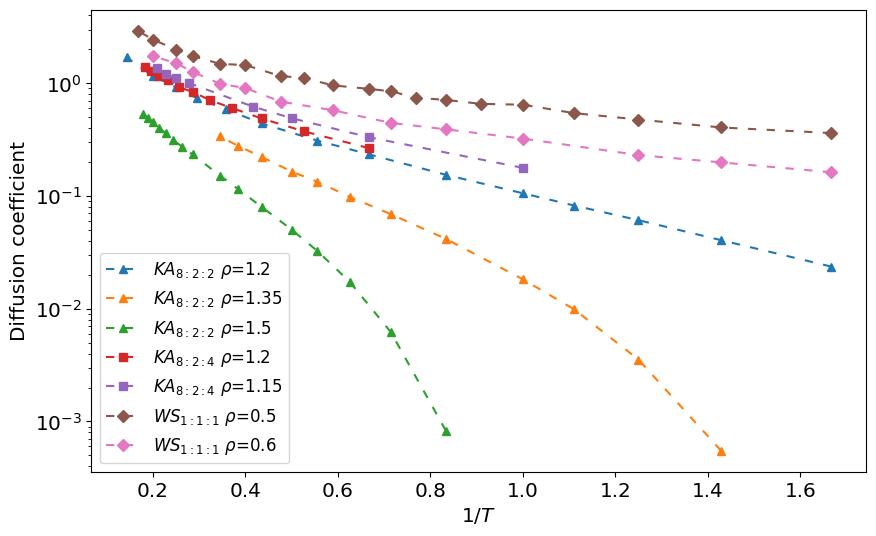

In [26]:
params = {'figure.figsize': (10, 6)}
pylab.rcParams.update(params)

# KA and WS

kind = 'diff-temp'
plotname = 'c'

plt.plot(KA822_D12["1/temp"], KA822_D12["diff_coef"], marker = '^', linestyle = line, label = "$KA_{8:2:2}$ $\\rho$=1.2")
plt.plot(KA822_D135["1/temp"], KA822_D135["diff_coef"], marker = '^', linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.35')
plt.plot(KA822_D15["1/temp"], KA822_D15["diff_coef"], marker = '^', linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.5')
plt.plot(KA824_D12["1/temp"], KA824_D12["diff_coef"], marker = 's', linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.2')
plt.plot(KA824_D115["1/temp"], KA824_D115["diff_coef"], marker = 's', linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.15')
plt.plot(WS111_D05["1/temp"], WS111_D05["diff_coef"], marker = 'D', linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.5')
plt.plot(WS111_D06["1/temp"], WS111_D06["diff_coef"], marker = 'D', linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.6')

show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$1/T$", ylabel="Diffusion coefficient")

### d

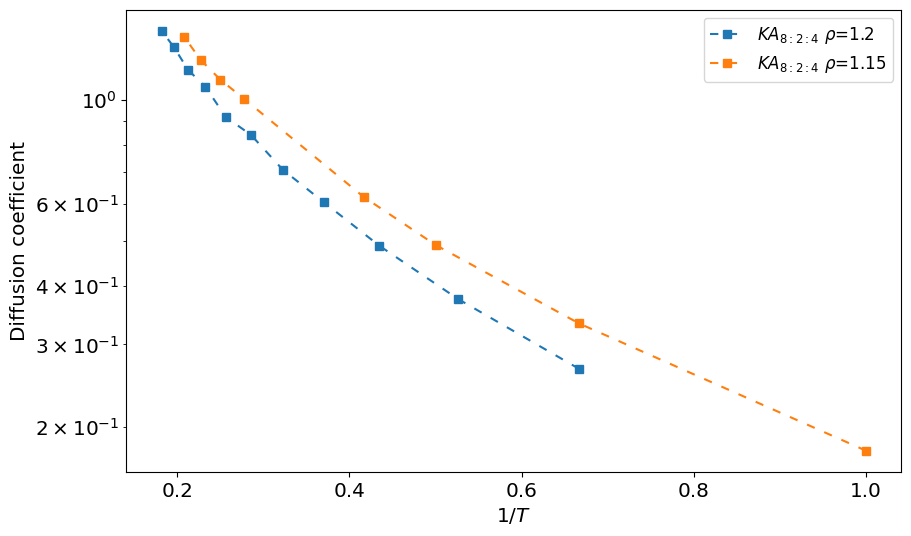

In [27]:
# KA 824
kind = 'diff-temp'
plotname = 'd'

mark = 'o'
line = (0, (4, 5))

params = {'legend.fontsize': 'large'}
pylab.rcParams.update(params)

plt.plot(KA824_D12["1/temp"], KA824_D12["diff_coef"], marker = 's', linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.2')
plt.plot(KA824_D115["1/temp"], KA824_D115["diff_coef"], marker = 's', linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.15')


show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$1/T$", ylabel="Diffusion coefficient")

# D / S_ex

# a

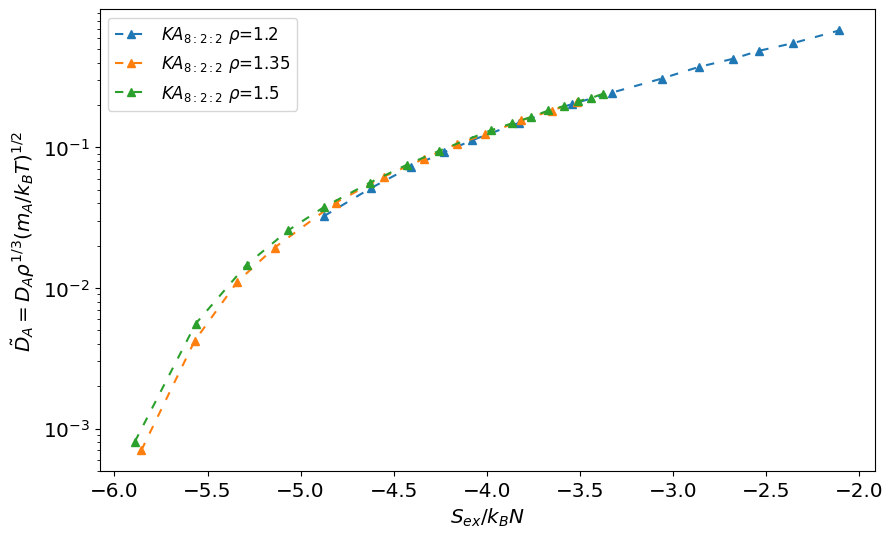

In [28]:
# KA822 diff rhos

kind = 'D-S_ex'
plotname = 'a'
mark = '^'

plt.plot(KA822_D12["S_ex"], KA822_D12["red_diff"],  marker = mark, linestyle = line, label = "$KA_{8:2:2}$ $\\rho$=1.2")
plt.plot(KA822_D135["S_ex"], KA822_D135["red_diff"], marker = mark, linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.35')
plt.plot(KA822_D15["S_ex"], KA822_D15["red_diff"], marker = mark, linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.5')

show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$S_{ex}/k_BN$", ylabel="$\\tilde{D}_{A}=D_{A}\\rho^{1/3}(m_A/k_BT)^{1/2}$")

# b

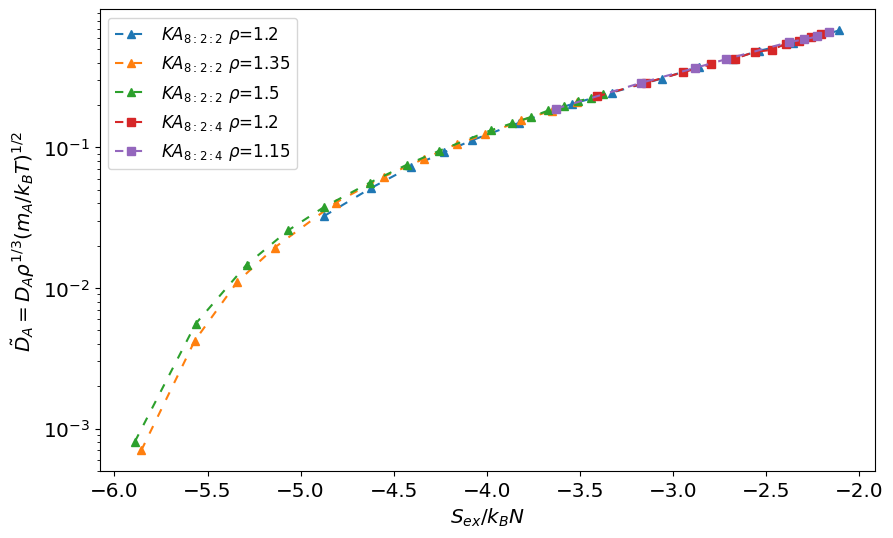

In [29]:
# KA822 to 824

kind = 'D-S_ex'
plotname = 'b'

plt.plot(KA822_D12["S_ex"], KA822_D12["red_diff"],  marker = mark, linestyle = line, label = "$KA_{8:2:2}$ $\\rho$=1.2")
plt.plot(KA822_D135["S_ex"], KA822_D135["red_diff"], marker = mark, linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.35')
plt.plot(KA822_D15["S_ex"], KA822_D15["red_diff"], marker = mark, linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.5')
plt.plot(KA824_D12["S_ex"], KA824_D12["red_diff"], marker = 's', linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.2')
plt.plot(KA824_D115["S_ex"], KA824_D115["red_diff"], marker = 's', linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.15')

show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$S_{ex}/k_BN$", ylabel="$\\tilde{D}_{A}=D_{A}\\rho^{1/3}(m_A/k_BT)^{1/2}$")

# c

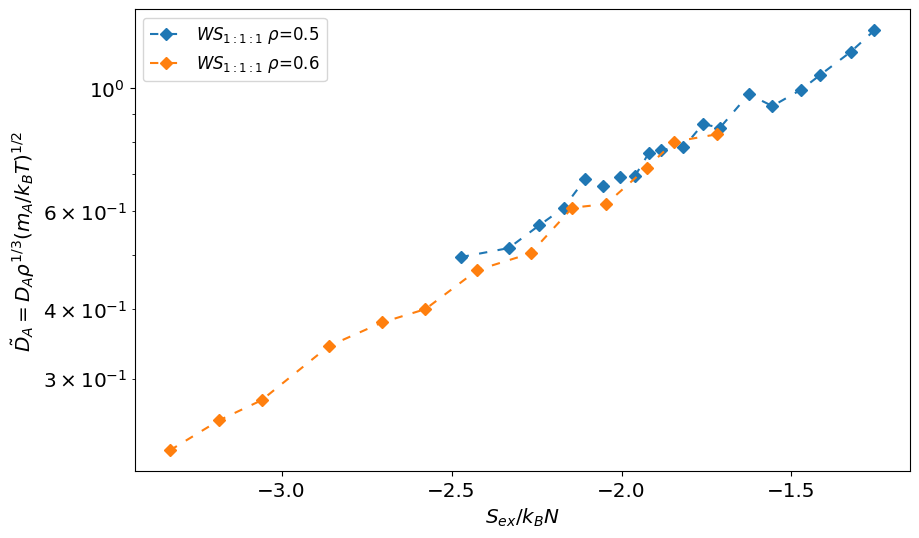

In [30]:
# WS111 diff rhos

kind = 'D-S_ex'
plotname = 'c'

mark = 'D'

plt.plot(WS111_D05["S_ex"], WS111_D05["red_diff"], marker = mark, linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.5')
plt.plot(WS111_D06["S_ex"], WS111_D06["red_diff"], marker = mark, linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.6')

show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$S_{ex}/k_BN$", ylabel="$\\tilde{D}_{A}=D_{A}\\rho^{1/3}(m_A/k_BT)^{1/2}$")


# d

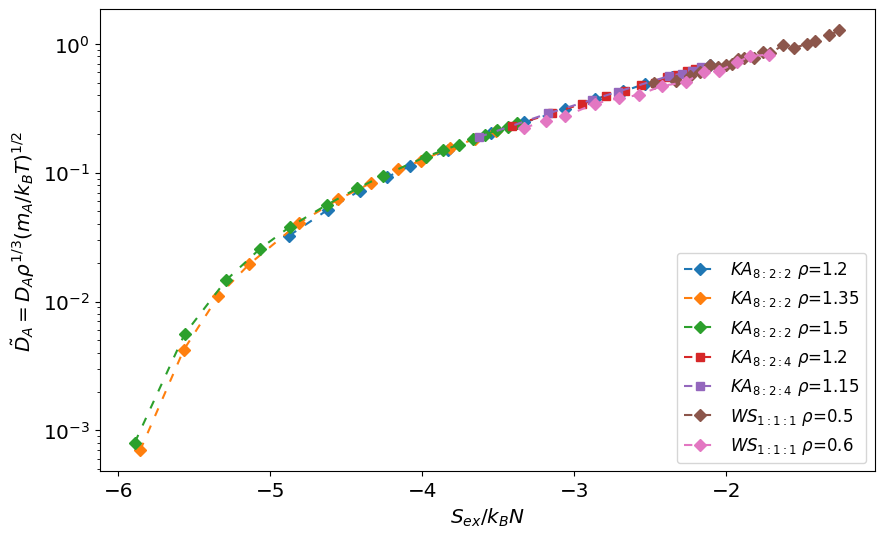

In [31]:
# KA and WS

kind = 'D-S_ex'
plotname = 'd'

plt.plot(KA822_D12["S_ex"], KA822_D12["red_diff"],  marker = mark, linestyle = line, label = "$KA_{8:2:2}$ $\\rho$=1.2")
plt.plot(KA822_D135["S_ex"], KA822_D135["red_diff"], marker = mark, linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.35')
plt.plot(KA822_D15["S_ex"], KA822_D15["red_diff"], marker = mark, linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.5')
plt.plot(KA824_D12["S_ex"], KA824_D12["red_diff"], marker = 's', linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.2')
plt.plot(KA824_D115["S_ex"], KA824_D115["red_diff"], marker = 's', linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.15')
plt.plot(WS111_D05["S_ex"], WS111_D05["red_diff"], marker = 'D', linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.5')
plt.plot(WS111_D06["S_ex"], WS111_D06["red_diff"], marker = 'D', linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.6')

show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$S_{ex}/k_BN$", ylabel="$\\tilde{D}_{A}=D_{A}\\rho^{1/3}(m_A/k_BT)^{1/2}$")

# e

C:\Users\mearo\AppData\Local\Temp\ipykernel_60816\888268598.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  AAmsd = pd.Series()


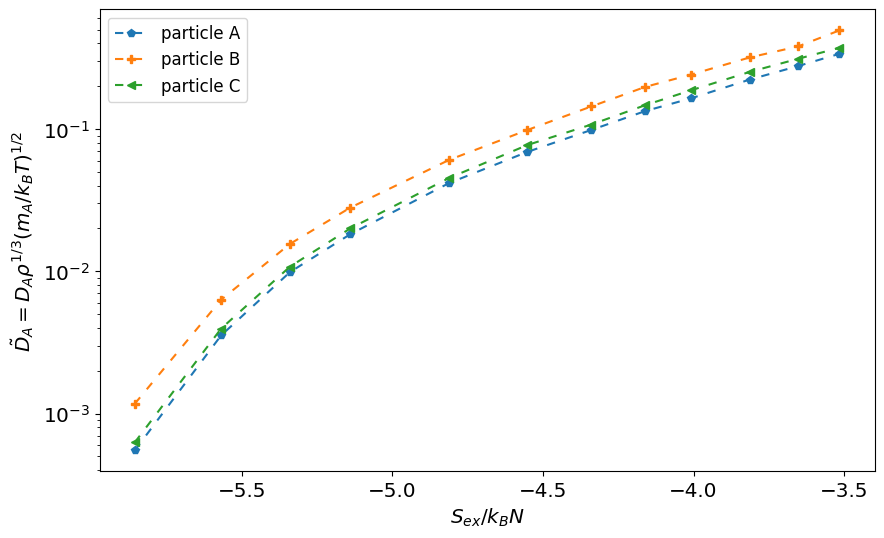

In [32]:
# KA822 rho1.35 3 types (use to justify our choice comparing majority types)

type3msd_df = pd.DataFrame()
kind = "msd"
init('KA822', '1.35')

mark = '^'

AAmsd = pd.Series()

for typenumber in range(1,4):
    msd_list = []
    for temp_str in temps_str:
        runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
        for run in runs[-1:]:
            df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat")) #makes dataframe from the given type of file (msd/fs etc)
            # plt.title(f"{model} rho{density} ({run}) \n {kind} - Temp {temp_str}")
            a_fit, b_fit, x_fit = fit_line(df[0][22:], df[typenumber][22:]) # fit the line
            msd_list.append(a_fit)
    type3msd_df[typenumber] = msd_list


kind = 'D-S_ex'
plotname = 'e'
type3msd_df = type3msd_df.drop(0)

# plt.plot(KA822_D135["S_ex"], KA822_D135["red_diff"], marker = mark, linestyle = line, label = '$KA_{8:2:2}$ $\\rho$=1.35$')

plt.plot(KA822_D135["S_ex"], type3msd_df[1], marker = 'p', linestyle = line, label = 'particle A')
plt.plot(KA822_D135["S_ex"], type3msd_df[2], marker = 'P', linestyle = line, label = 'particle B')
plt.plot(KA822_D135["S_ex"], type3msd_df[3], marker = '<', linestyle = line, label = 'particle C')

titlemaker('KA822', '1.2', '')
show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$S_{ex}/k_BN$", ylabel="$\\tilde{D}_{A}=D_{A}\\rho^{1/3}(m_A/k_BT)^{1/2}$")


        # temp_diff_df = pd.DataFrame({'temp':[float(temp_str)], 'diff_coef':[a_fit]})
        # type3msd_df = pd.concat([type3msd_df, temp_diff_df], ignore_index=True)

# f

C:\Users\mearo\AppData\Local\Temp\ipykernel_60816\101637221.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  AAmsd = pd.Series()


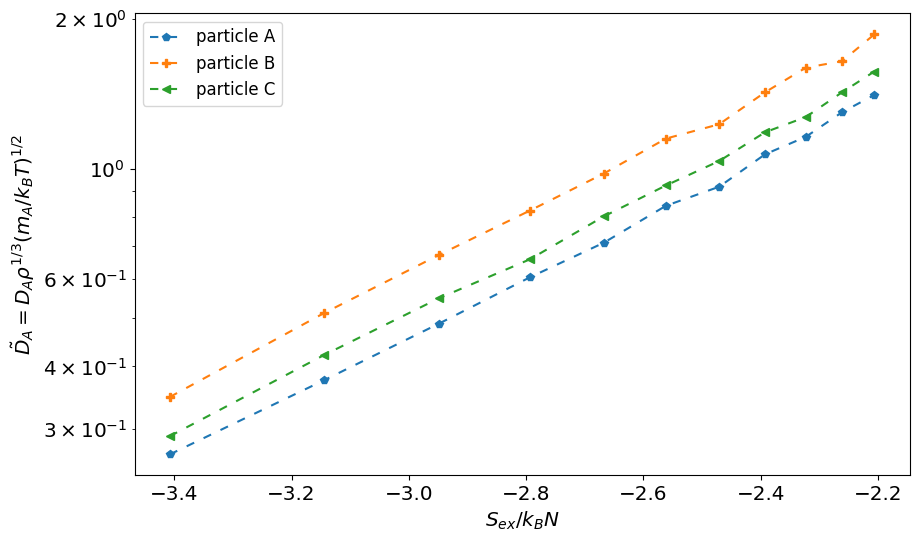

In [33]:
# KA824 3 types*

type3msd_df = pd.DataFrame()
kind = "msd"
init('KA824', '1.2')

AAmsd = pd.Series()

for typenumber in range(1,4):
    msd_list = []
    for temp_str in temps_str:
        runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
        for run in runs[-1:]:
            df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat")) #makes dataframe from the given type of file (msd/fs etc)
            # plt.title(f"{model} rho{density} ({run}) \n {kind} - Temp {temp_str}")
            a_fit, b_fit, x_fit = fit_line(df[0][22:], df[typenumber][22:]) # fit the line
            msd_list.append(a_fit)
    type3msd_df[typenumber] = msd_list


kind = 'D-S_ex'
plotname = 'f'
# type3msd_df = type3msd_df.drop(0)

plt.plot(KA824_D12["S_ex"], type3msd_df[1], marker = 'p', linestyle = line, label = 'particle A')
plt.plot(KA824_D12["S_ex"], type3msd_df[2], marker = 'P', linestyle = line, label = 'particle B')
plt.plot(KA824_D12["S_ex"], type3msd_df[3], marker = '<', linestyle = line, label = 'particle C')

titlemaker('KA824', '1.2', '')
show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$S_{ex}/k_BN$", ylabel="$\\tilde{D}_{A}=D_{A}\\rho^{1/3}(m_A/k_BT)^{1/2}$")


        # temp_diff_df = pd.DataFrame({'temp':[float(temp_str)], 'diff_coef':[a_fit]})
        # type3msd_df = pd.concat([type3msd_df, temp_diff_df], ignore_index=True)

# g

C:\Users\mearo\AppData\Local\Temp\ipykernel_60816\552265455.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  AAmsd = pd.Series()


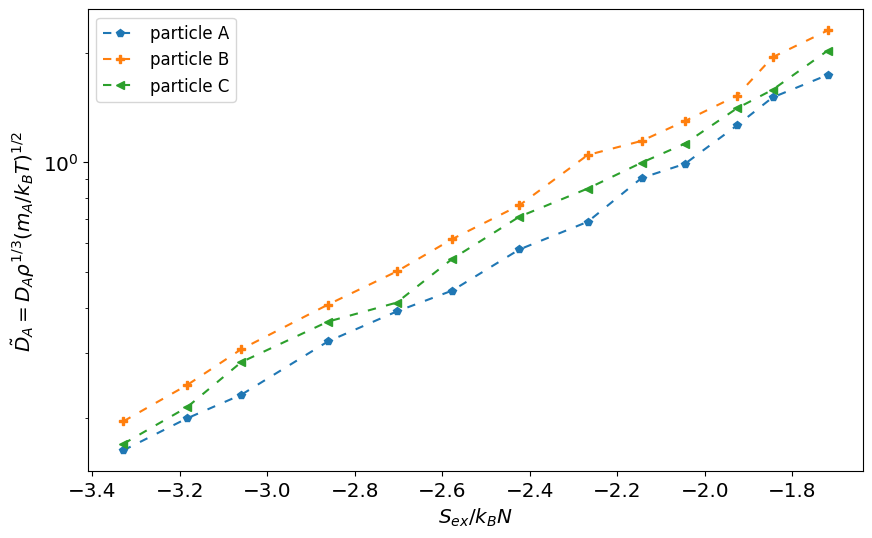

In [34]:
# WS111 rho0.6 3 types

type3msd_df = pd.DataFrame()
kind = "msd"
init('WS111', '0.6')

AAmsd = pd.Series()

for typenumber in range(1,4):
    msd_list = []
    for temp_str in temps_str:
        runs = os.listdir(f"{tempfolders_loc}/T{temp_str}/") #returns the folder names in the temperature folder
        for run in runs[-1:]:
            df = pd.DataFrame(np.loadtxt(f"{tempfolders_loc}/T{temp_str}/{run}/{kind}.dat")) #makes dataframe from the given type of file (msd/fs etc)
            # plt.title(f"{model} rho{density} ({run}) \n {kind} - Temp {temp_str}")
            a_fit, b_fit, x_fit = fit_line(df[0][22:], df[typenumber][22:]) # fit the line
            msd_list.append(a_fit)
    type3msd_df[typenumber] = msd_list


kind = 'D-S_ex'
plotname = 'g'

plt.plot(WS111_D06["S_ex"], type3msd_df[1], marker = 'p', linestyle = line, label = 'particle A')
plt.plot(WS111_D06["S_ex"], type3msd_df[2], marker = 'P', linestyle = line, label = 'particle B')
plt.plot(WS111_D06["S_ex"], type3msd_df[3], marker = '<', linestyle = line, label = 'particle C')

titlemaker('WS111', '0.6', '')
show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$S_{ex}/k_BN$", ylabel="$\\tilde{D}_{A}=D_{A}\\rho^{1/3}(m_A/k_BT)^{1/2}$")


        # temp_diff_df = pd.DataFrame({'temp':[float(temp_str)], 'diff_coef':[a_fit]})
        # type3msd_df = pd.concat([type3msd_df, temp_diff_df], ignore_index=True)

# h

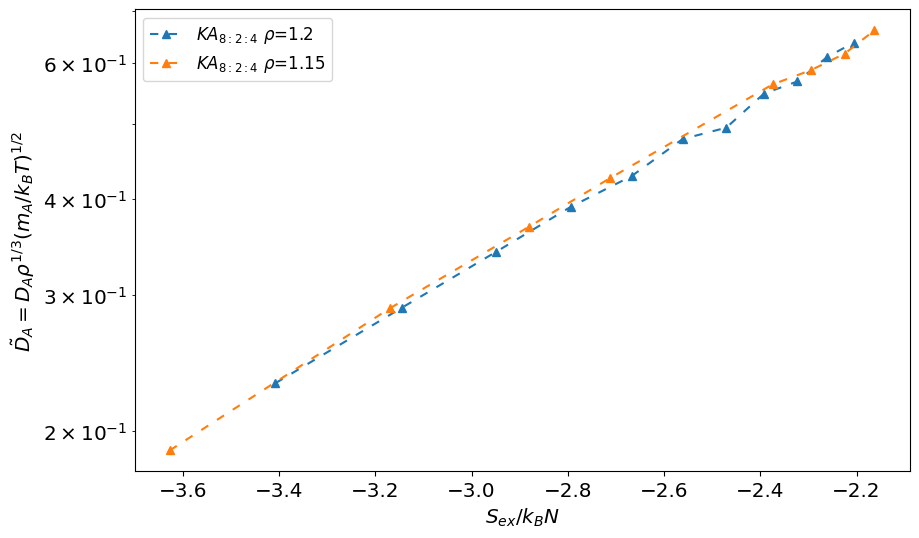

In [35]:
# KA
kind = 'D-S_ex'
plotname = 'h'

params = {'legend.fontsize': 'large'}
pylab.rcParams.update(params)

plt.plot(KA824_D12["S_ex"], KA824_D12["red_diff"], marker = mark, linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.2')
plt.plot(KA824_D115["S_ex"], KA824_D115["red_diff"], marker = mark, linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.15')


show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$S_{ex}/k_BN$", ylabel="$\\tilde{D}_{A}=D_{A}\\rho^{1/3}(m_A/k_BT)^{1/2}$")

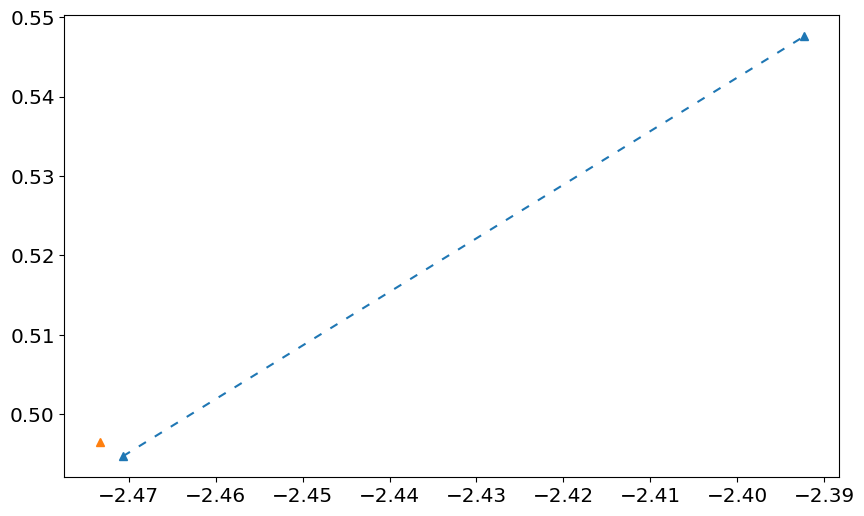

In [36]:
# KA and WS

kind = 'D-S_ex'
plotname = 'd'

plt.plot(KA824_D12["S_ex"][-5:-3], KA824_D12["red_diff"][-5:-3], marker = mark, linestyle = line, label = '$KA_{8:2:4}$ $\\rho$=1.2')
plt.plot(WS111_D05["S_ex"][:1], WS111_D05["red_diff"][:1], marker = mark, linestyle = line, label = '$WS_{1:1:1}$ $\\rho$=0.5')

# show_plot(figname = f"{kind}_{plotname}", ylog= True, xlabel="$S_{ex}/k_BN$", ylabel="$\\tilde{D}_{A}=D_{A}\\rho^{1/3}(m_A/k_BT)^{1/2}$")